分布関数
========

## 期待値と確率変数

サイコロを振って出る目はだいたいどのくらいになるでしょうか？
つまり、サイコロを十分に多く振った場合の平均値は、おおよそいくつになるかという質問です。

直感的にはサイコロの目は1から6まであるため、
```{math}
\frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5
```
という計算をして、平均を求めれば良さそうですね。

ただし、この計算はサイコロの目の出る確率が等しいという仮定をしています。
このように確率的に出てくる値に対しての平均は**期待値**といいます。
期待値は値とその値の確率をかけて足すため
```{math}
1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5
```
という計算になります。先ほど計算した平均値と同じ結果ですね。

期待値のより厳密な計算は式{eq}`expected_value`になります。
```{math}
:label: expected_value
\sum_{i=1}^{n} X_i \cdot P(X_i)
```

ここで、$X_i$は取りうる値で**確率変数**といいます。
サイコロの確率変数は1-6になります。$P(X_i)$はその確率変数の確率になります。

期待値は長期的な平均を表しているため、数回のサイコロを振った結果とは異なる可能性があります。
試行を繰り返すほど、平均値は期待値に近づいていきます。
このような傾向を**大数の法則**といいます。
このことをプログラムで確認しましょう。

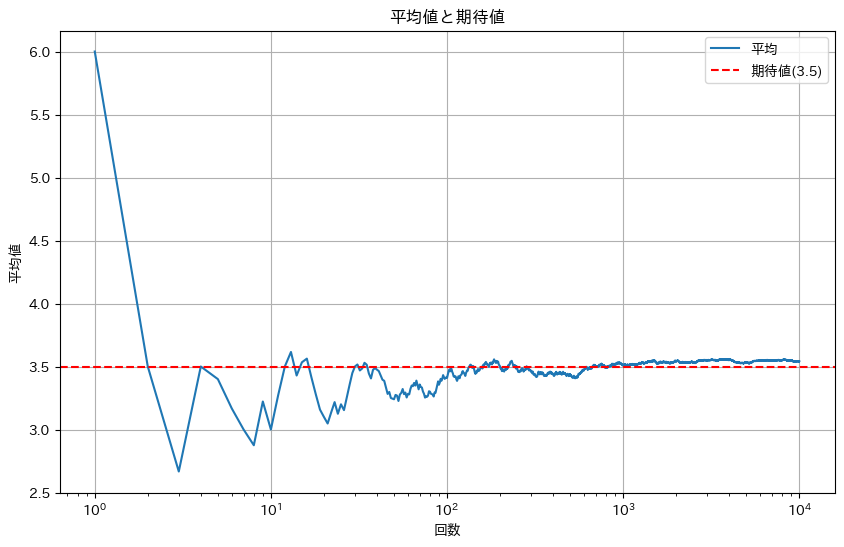

最終的な平均値: 3.5408


In [1]:
import random
import japanize_matplotlib
import matplotlib.pyplot as plt

random.seed(42)

def roll_dice():
    return random.randint(1, 6)

def simulate_dice_rolls(num_rolls):
    total = 0
    averages = []
    
    for i in range(1, num_rolls + 1):
        roll = roll_dice()
        total += roll
        average = total / i
        averages.append(average)
    
    return averages

num_rolls = 10000
expected_value = 3.5

results = simulate_dice_rolls(num_rolls)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rolls + 1), results, label='平均')
plt.axhline(y=expected_value, color='r', linestyle='--', label='期待値(3.5)')
plt.xlabel('回数')
plt.ylabel('平均値')
plt.title('平均値と期待値')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()
print(f"最終的な平均値: {results[-1]:.4f}")

5行目は`random`ライブラリの`seed`関数を引数42で呼んでいます。
これは乱数生成器の初期状態を設定しています。
シード値を設定すると、乱数の生成順序が固定されます。
つまり、同じシード値を使用すれば、プログラムを何度実行しても同じ結果が得られます。
42という数字自体に特別な意味はなく、任意の整数を使用できます。
異なるシード値を使用すると、異なる乱数列が生成されます。

34行目でx軸を対数（log）スケールにした理由は、線形スケールと比較して以下のようなメリットがあるためです。

- データの広範囲な表示
   - 広い範囲のデータを1つのグラフ上で効果的に表示できます。初期の変動から長期的な収束まで、10,000回の試行全体を見やすく表現できます。

- 初期変動の詳細な観察
   - 最初の数十回や数百回での平均値の大きな変動を詳細に観察できます。線形スケールでは見えにくい初期の急激な変化が明確になります。

- 収束過程の可視化
   - 平均値が期待値に近づいていく過程がより明確に表現されます。初期の不安定な状態から徐々に安定していく様子が分かりやすくなります。

- データ分布の均一化
   - 線形スケールでは後半のデータが密集して見えてしまいますが、対数スケールを使用することで、データの分布が均一化され、全体の傾向がより把握しやすくなります。

(subsec-distribution-function)=
## 分布関数

プログラムでは、`random.randint(1, 6)`と書いてサイコロのシミュレーションをしていました。
この関数は1から6までの整数をランダムに返します。
この関数を十分に多く実行すると、各数字が等しい確率で出現するようになります。

このような振る舞いを理解するために**確率分布**という概念を導入します。
確率分布とは、ある事象（この場合はサイコロの目）が起こる可能性の度合いを表します。

サイコロの場合、1から6までの各目が出る確率が等しいという特徴があります。
このように、すべての可能な結果が等しい確率で発生するパターンを**一様分布**と呼びます。

逆に考えると、一様分布に従うデータが必要な場合、`random.randint`関数を使用します。

では一様分布ではなく、何か偏った分布が必要な場合はどうでしょうか？
一様分布以外にもよく用いられる分布を以下に挙げます。

- ベルヌーイ分布
   - 成功か失敗の2つの結果しかない試行（例：コイン投げ）を表す分布です。成功の確率をpとすると、失敗の確率は1-pになります。

- 二項分布
   - ベルヌーイ試行を複数回繰り返したときの成功回数の分布です。例えば、コインを10回投げて表が出る回数の分布などです。

- ポアソン分布
   - 一定時間内に発生する事象の回数を表す分布です。例えば、1時間あたりに店に来る客の数などがこの分布に従います。

- 正規分布（ガウス分布）
  - 自然界の多くの現象を表す釣鐘型の分布です。身長や体重などの人間の特性がこの分布に従います。

Pythonを使ってこれらの分布のサンプルコードを書いてみます。

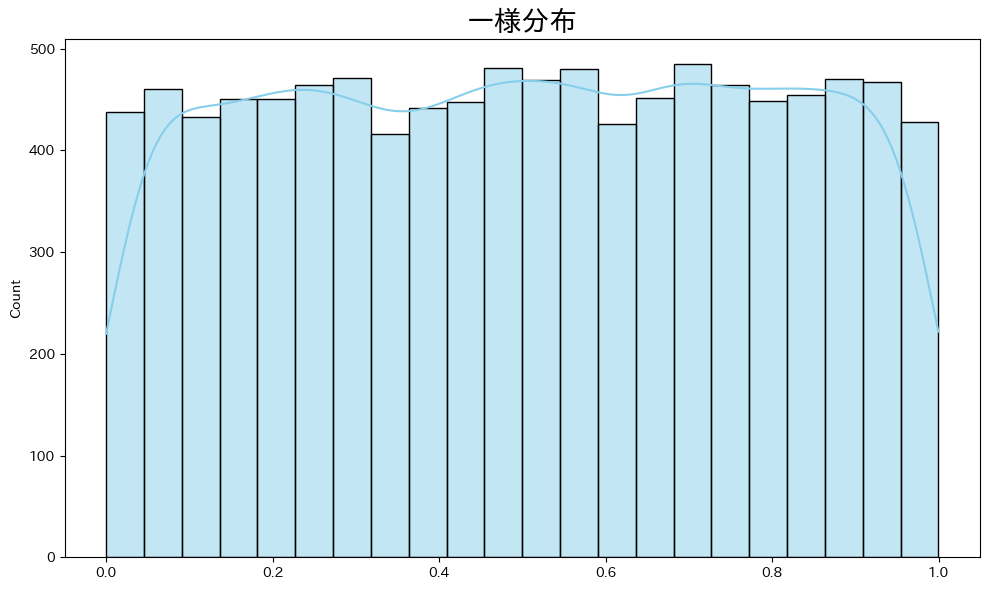

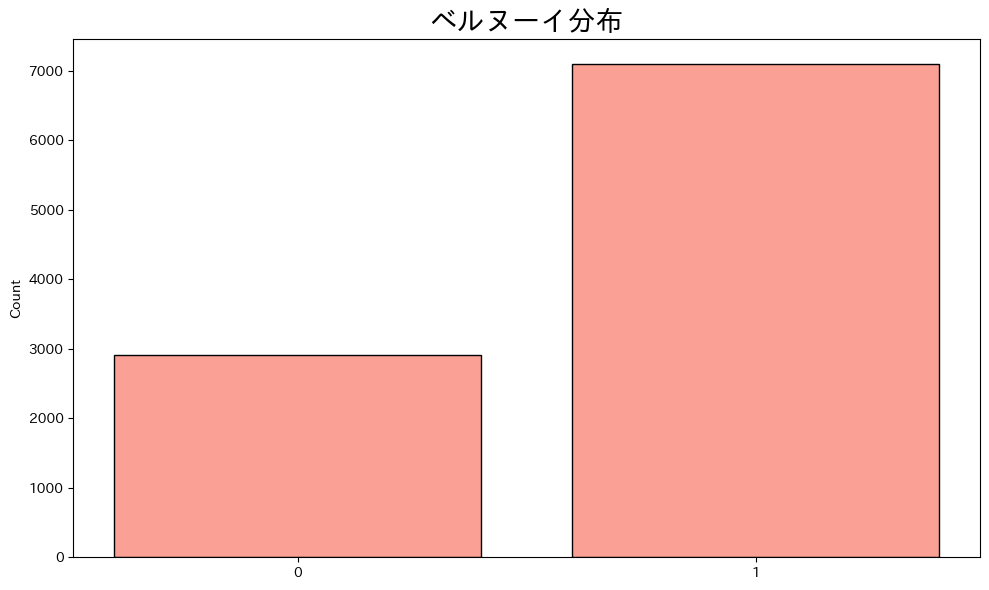

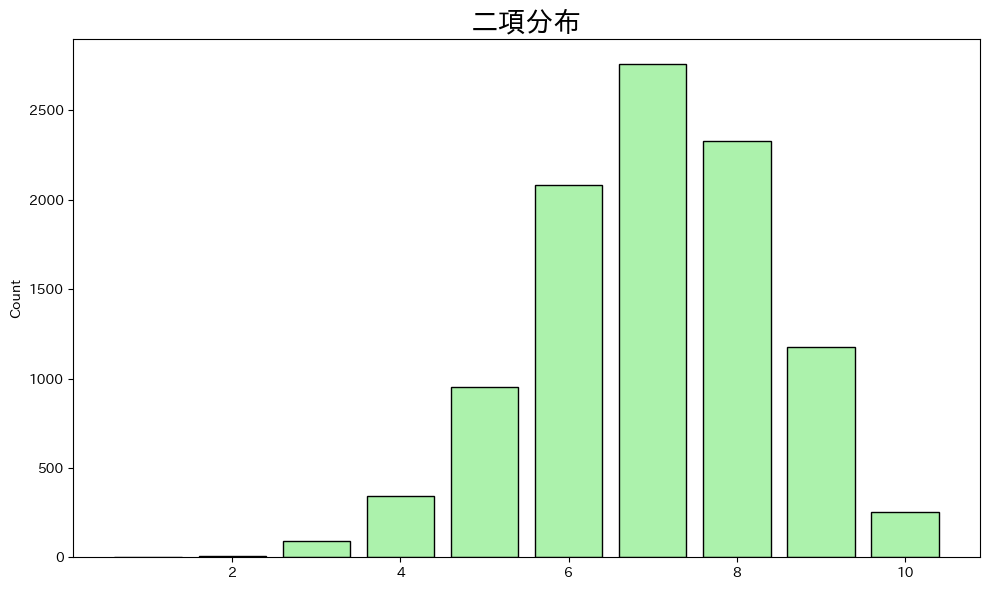

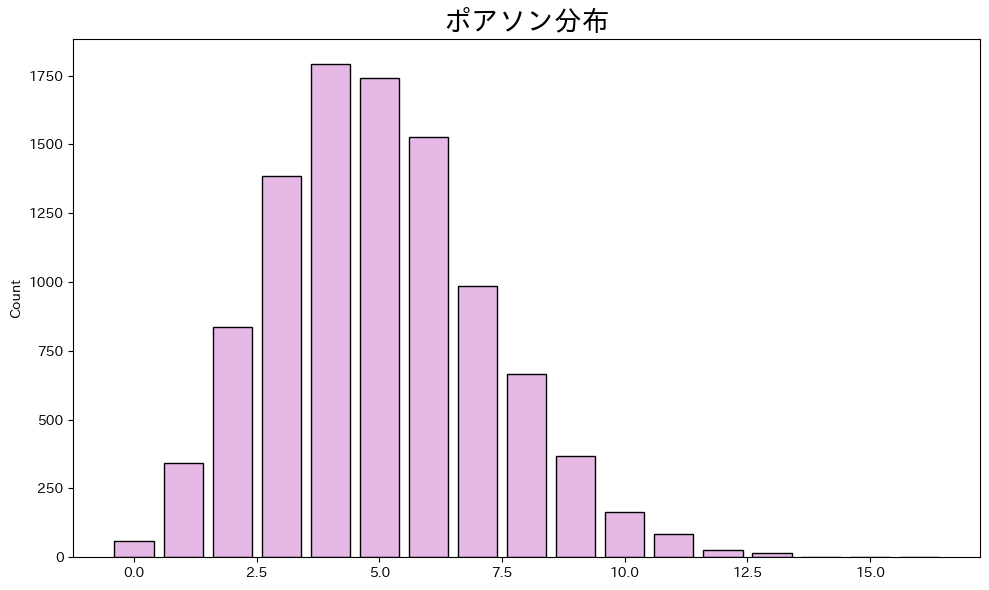

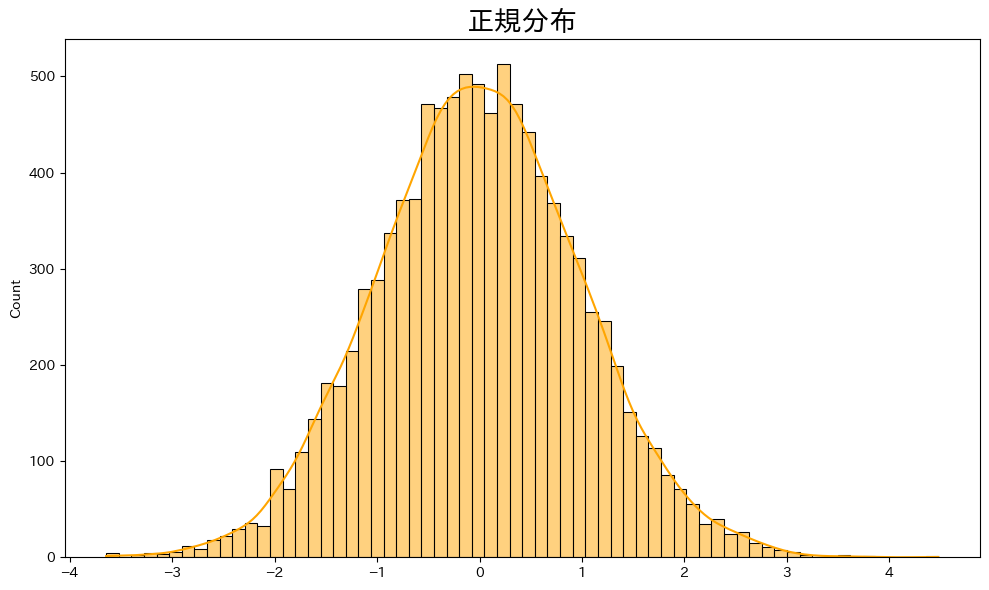

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

n_samples = 10000

def plot_distribution(samples, title, color, discrete=False, xticks=None):
    plt.figure(figsize=(10, 6))
    if discrete:
        sns.histplot(samples, discrete=True, shrink=.8, color=color)
    else:
        sns.histplot(samples, kde=True, color=color)
    plt.title(title, fontsize=20, fontweight='bold')
    if xticks is not None:
        plt.xticks(xticks)
    plt.tight_layout()
    plt.show()

# 一様分布
uniform_samples = np.random.uniform(0, 1, n_samples)
plot_distribution(uniform_samples, '一様分布', "skyblue")

# ベルヌーイ分布
p = 0.7
bernoulli_samples = np.random.binomial(1, p, n_samples)
plot_distribution(bernoulli_samples, 'ベルヌーイ分布', "salmon", discrete=True, xticks=[0, 1])

# 二項分布
n = 10
binomial_samples = np.random.binomial(n, p, n_samples)
plot_distribution(binomial_samples, '二項分布', "lightgreen", discrete=True)

# ポアソン分布
lambda_param = 5
poisson_samples = np.random.poisson(lambda_param, n_samples)
plot_distribution(poisson_samples, 'ポアソン分布', "plum", discrete=True)

# 正規分布
mu, sigma = 0, 1
normal_samples = np.random.normal(mu, sigma, n_samples)
plot_distribution(normal_samples, '正規分布', "orange")

`numpy.random`モジュールには、確率分布に従ってデータを生成する様々な関数が用意されています。
それぞれについて説明します。

- `np.random.uniform(low, high, size)`
  - 一様分布 (Uniform Distribution)
  - 指定された範囲内（`low - high`）のすべての値が等確率で`size`個のサンプルを生成

- `np.random.binomial(n=1, p, size)`（nを1に設定するとベルヌーイ分布になります）
  - ベルヌーイ分布 (Bernoulli Distribution)
  - 成功（1）または失敗（0）の2つの値のみを生成

- `np.random.binomial(n, p, size)`
   - 二項分布 (Binomial Distribution)
   - `n`回の独立した試行における成功回数を生成

- `np.random.poisson(lam, size)`
   - ポアソン分布 (Poisson Distribution)
   - 一定期間内に発生する事象の平均回数（期待値）`lam`に基づいて、その期間の事象発生回数を生成

- `np.random.normal(mu, sigma, size)`
   - 正規分布（ガウス分布）(Normal/Gaussian Distribution)
   - 平均（`mu`）と標準偏差（`sigma`）で特徴づけられる連続確率分布からサンプルを生成

実行結果を見ると、以下のような特徴が観察できます。

- 一様分布
  - すべての値が等しい確率で発生しているため、ヒストグラムはほぼ平らになります。
- ベルヌーイ分布
  - 0と1の2つの値のみが存在し、その比率が設定した確率pに近くなります。
- 二項分布
  - n回の試行での成功回数を示す釣鐘型の分布になります。
- ポアソン分布
  - 離散的な値を取る右寄りの分布になります。
- 正規分布
  - ベル型の対称な分布になります。

プログラムでは、これらの分布を表示するため`plot_distribution`という関数を定義し使っています。

`discrete`という引数で離散データの場合は棒グラフ、連続データの場合はヒストグラムを表示するように変更しています。表示するときはseabornライブラリの`histplot`関数を使っています。
`histplot`は、データの分布を表示するときに使用します。

`xticks`はx軸の目盛りを指定しています。
指定しない場合は、デフォルトの目盛りが使用されます。
通常は`xticks`を指定しなくてもよいのですが、
ベルヌーイ分布の場合は最初から0と1しか値がないことがわかっているため、
`xticks`で目盛りを明示的に指定しています。

(subsec-normal)=
## 正規分布

私たちの身の回りには、さまざまな**ばらつき**が存在します。
例えば

- クラスの生徒の身長
- 工場で生産される製品の重さ
- 毎日の気温の変化
- テストの得点分布

これらの現象を観察すると、多くの場合、特定の特徴を持つ分布パターンが現れます。
そのパターンの中で最も有名で、統計学の基礎となる分布が{index}`正規分布<せいきぶんぷ - 正規分布>`です。

正規分布は、データが中心の値（平均）を中心にして左右対称に分布し、
中心から離れるほどデータの出現頻度が少なくなるという特徴を持っています。
その形状から**ベル曲線**や**釣鐘型の曲線**とも呼ばれます。

統計解析等でよく使われるRのデータセットからDavisというデータを使って正規分布をみてましょう。
このデータセットには200人分の性別、身長、体重、また自己申告した身長、体重があります。

プログラムを使ってデータの中身を確認するプログラムを書きます。

In [3]:
import pandas as pd
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=False)
df.head()

,rownames,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


では、体重をヒストグラムで見てみましょう。

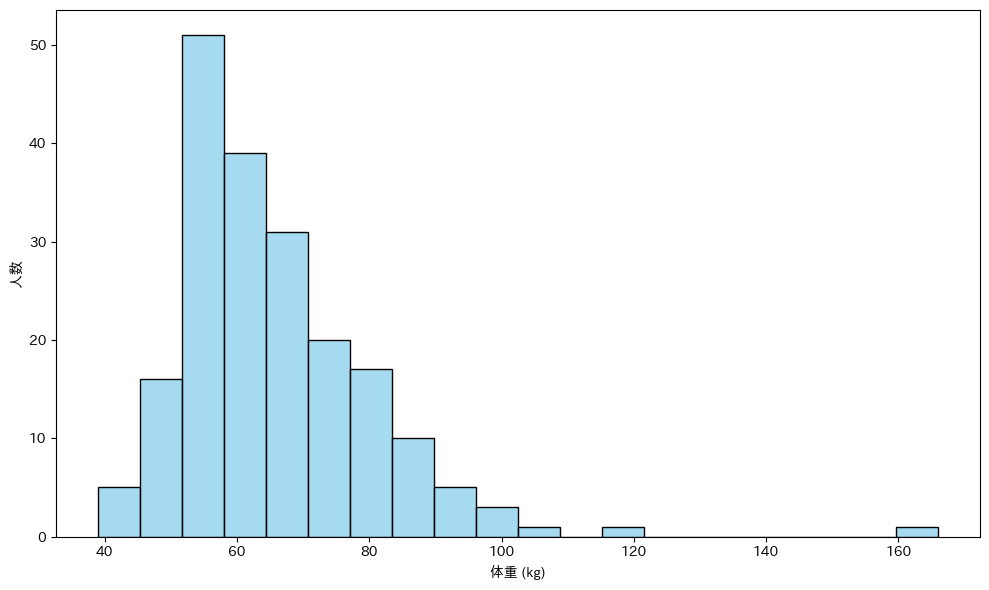

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=0)

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='weight', color='skyblue', edgecolor='black')

plt.xlabel('体重 (kg)')
plt.ylabel('人数')

# プロットの表示
plt.tight_layout()
plt.show()

釣鐘型になっているでしょうか。

このような分布パターンは、自然界や社会現象の多くの場面で観察されます。
そのため、正規分布は統計学や確率論において非常に重要な役割を果たしています。

では、正規分布とは具体的にどのようなものなのか、その特徴や性質について詳しく見ていきましょう。

正規分布は式{eq}`normal-dist`で表されます。
式中の$\mu$、$\sigma$はそれぞれ平均と標準偏差を表します。
平均0、標準偏差1の正規分布は**標準正規分布**と呼ばれる特別な分布です。

```{math}
:label: normal-dist
f(x) = \frac{1}{\sqrt{2\pi \sigma}} \exp \left(-\frac{(x - \mu)^2}
{2\sigma^2} \right) \hspace{20px} (-\infty < x < \infty)
```

正規分布をプログラムを使って書いてみましょう。

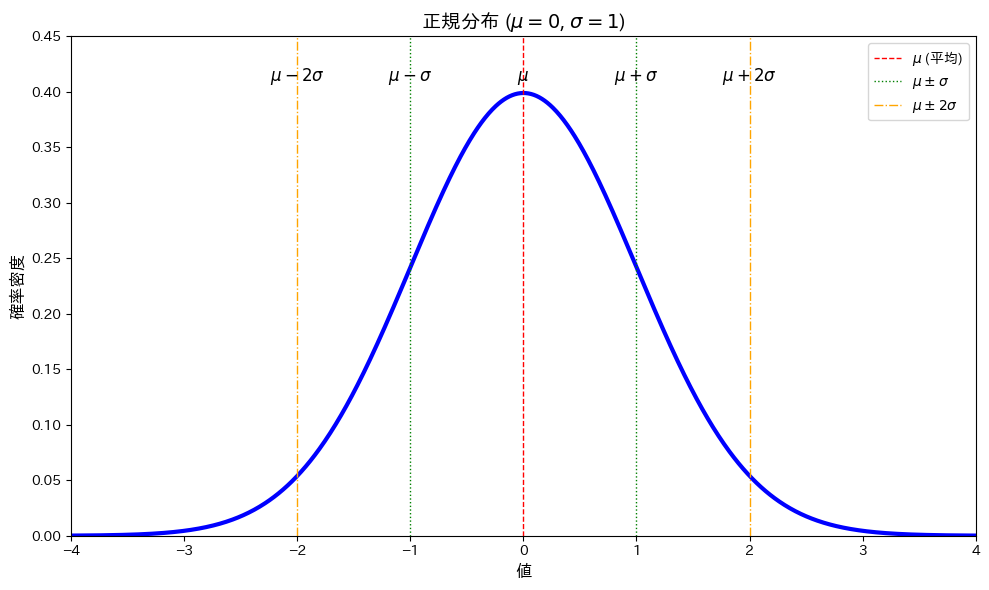

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def normal(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

mu = 0
sigma = 1

x = np.linspace(-4, 4, 1000)
y = normal(x, mu, sigma)

plt.figure(figsize=(10, 6))

plt.plot(x, y, color='blue', lw=3)

plt.axvline(mu, color='red', linestyle='--', lw=1, label=r'$\mu$ (平均)')
plt.axvline(mu - sigma, color='green', linestyle=':', lw=1, label=r'$\mu \pm \sigma$')
plt.axvline(mu + sigma, color='green', linestyle=':', lw=1)
plt.axvline(mu - 2*sigma, color='orange', linestyle='-.', lw=1, label=r'$\mu \pm 2\sigma$')
plt.axvline(mu + 2*sigma, color='orange', linestyle='-.', lw=1)

plt.title(r'正規分布 ($\mu=0$, $\sigma=1$)', fontsize=14)
plt.xlabel('値', fontsize=12)
plt.ylabel('確率密度', fontsize=12)
plt.xlim(-4, 4)
plt.ylim(0, 0.45)

plt.legend(fontsize=10)

plt.text(mu, 0.41, r'$\mu$', ha='center', fontsize=12)
plt.text(mu - sigma, 0.41, r'$\mu - \sigma$', ha='center', fontsize=12)
plt.text(mu + sigma, 0.41, r'$\mu + \sigma$', ha='center', fontsize=12)
plt.text(mu - 2*sigma, 0.41, r'$\mu - 2\sigma$', ha='center', fontsize=12)
plt.text(mu + 2*sigma, 0.41, r'$\mu + 2\sigma$', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

プログラムの説明をします。
プログラムの結果は正規分布と平均、またその平均から標準偏差分離れている場所を表示しています。

`matplotlib`ライブラリの説明は機能を使っているだけなので、省略します。
興味がある人は[こちらの資料](https://matplotlib.org/cheatsheets/)を見るとよいでしょう。

`np.linspace(-4, 4, 1000)`は、$-4$から$4$までの範囲を1000個の等間隔の点に分割した数列を生成します。
ここではその数列をx軸の値として使用しています。

プログラムの結果を見て、以下の正規分布の性質を確認しましょう。

- 平均を中心として左右対称のベル型をしている
- $\mu \pm \sigma$の区間に約68%の確率が含まれる
- $\mu \pm 2\sigma$の区間に約95%の確率が含まれる

この分布では、ある区間で事象が起こる確率は、その区間で曲線と横軸に囲まれた部分の面積で表されます。
そのため、正規分布の曲線下の全面積は1（つまり100%）となります。

これらの性質は、正規分布の**68-95-99.7ルール**として知られています。
このルールによると、$\mu \pm 3\sigma$の区間内に全データの約99.7%が含まれます。

このルールは、データの分布や異常値の検出などにおいて非常に有用です。
例えば、平均から3標準偏差以上離れたデータは、正規分布に従うデータセットでは非常にまれであり、
約0.3%しか発生しません。
そのため、異常値や外れ値を判定する基準として、平均から3標準偏差以上離れたデータを用いることがよくあります。

正規分布と関連のある**中心極限定理**について説明します。
中心極限定理とは、独立した確率変数の和（または平均）の分布が、サンプルサイズが大きくなるにつれて正規分布に近づくという定理です。
サイコロの例を使うと、

以下のPythonコードを使って、サイコロを振る実験をシミュレートし、中心極限定理を確認してみましょう。

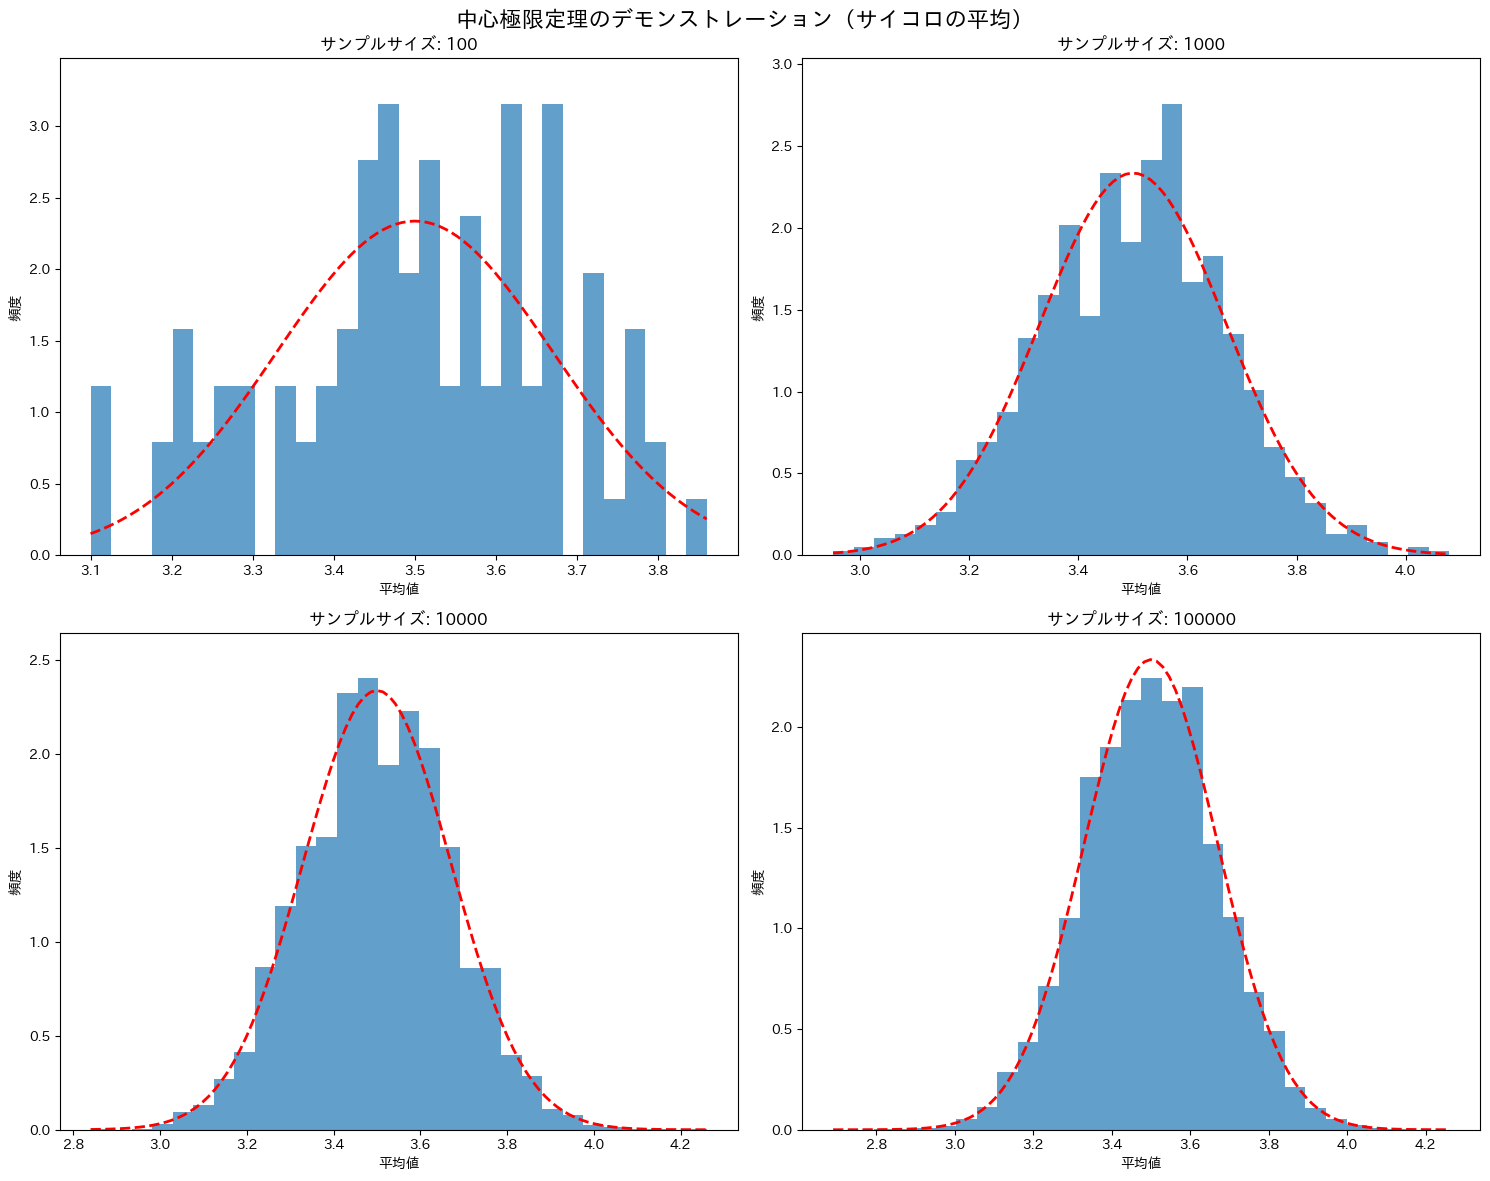

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def roll_dice():
    return random.randint(1, 6)

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# シミュレーションの設定
num_rolls = 100
num_experiments = 100000

averages = []

for _ in range(num_experiments):
    rolls = [roll_dice() for _ in range(num_rolls)]
    averages.append(np.mean(rolls))

# グラフの設定
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("中心極限定理のデモンストレーション（サイコロの平均）", fontsize=16)

sample_sizes = [100, 1000, 10000, 100000]

for i, sample_size in enumerate(sample_sizes):
    row = i // 2
    col = i % 2
    
    s_average = averages[:sample_size]
    
    # ヒストグラムの描画
    n, bins, _ = axs[row, col].hist(s_average, bins=30, density=True, alpha=0.7)
    
    # 理論的な正規分布の計算
    mu = 3.5  # サイコロの期待値
    sigma = np.sqrt(35/12) / np.sqrt(num_rolls)  # 理論的な標準偏差
    x = np.linspace(min(bins), max(bins), 100)
    y = normal_pdf(x, mu, sigma)
    
    # 理論的な正規分布の描画
    axs[row, col].plot(x, y, 'r--', linewidth=2)
    
    axs[row, col].set_title(f"サンプルサイズ: {sample_size}")
    axs[row, col].set_xlabel("平均値")
    axs[row, col].set_ylabel("頻度")
    
    # y軸の範囲を調整
    axs[row, col].set_ylim(0, max(n) * 1.1)

plt.tight_layout()
plt.show()

このコードは以下のことを行います：

1. 1個、2個、3個、10個のサイコロを振るシミュレーションを行います。
2. 各ケースで10,000回の実験を行い、結果をヒストグラムで表示します。
3. 理論的な正規分布を赤い点線で重ねて表示します。

結果の解釈：

1. 1個のサイコロ：
   - 結果は離散的で、1から6の間の一様分布に近い形になります。
   - 正規分布からは程遠い形状です。

2. 2個のサイコロ：
   - 分布は三角形に近い形になります。
   - まだ完全な正規分布ではありませんが、1個の時よりも滑らかになります。

3. 3個のサイコロ：
   - 分布はより滑らかになり、正規分布に近づきます。
   - 中央が盛り上がり、裾野が広がる形状が見られます。

4. 10個のサイコロ：
   - 分布は明らかに正規分布に近い形状になります。
   - 理論的な正規分布（赤い点線）とほぼ一致しています。

中心極限定理の重要なポイント：

1. サンプルサイズ（この場合はサイコロの数）が大きくなるほど、合計値の分布は正規分布に近づきます。
2. 元の分布（1個のサイコロの結果）が一様分布であっても、合計値は正規分布に近づきます。
3. この定理は、多くの自然現象や統計的処理において正規分布が頻繁に現れる理由を説明しています。

この例は、中心極限定理が実際にどのように機能するかを視覚的に示しています。この定理は統計学の基礎となる重要な概念で、多くの統計的推論や分析の基盤となっています。


## 偏差値（Standard Score）

**偏差値**という言葉を聞いたことがない人はほとんどいないでしょう。
偏差値は高校や大学の入試、模擬試験の結果評価などで広く活用されており、正規分布を理解していればその意味がよくわかります。

偏差値は、個々のデータが平均からどれだけ離れているかを、標準偏差を単位として表した値です。
平均を50とし、標準偏差10を1単位として換算します。これにより、異なるデータセット間での相対的な位置を比較しやすくなります。

偏差値は以下の式{eq}`standard-score-formula`で計算できます。

```{math}
:label: standard-score-formula
\text{偏差値} = 50 + 10 \times \frac{x - \mu}{\sigma}
```

ここで、

- $x$は個々のデータ
- $\mu$は平均
- $\sigma$は標準偏差

を表しています。

Pythonを使って偏差値を計算するプログラムを書いてみましょう。

In [7]:
from statistics import mean, stdev

scores = [75, 82, 68, 90, 78]

# 平均と標準偏差を計算
mu = mean(scores)
sigma = stdev(scores)

# 偏差値を計算
standard_scores = [50 + 10 * (x - mu) / sigma for x in scores]

# 結果を表示
for original, standard in zip(scores, standard_scores):
    print(f"Original score: {original}, Standard score: {standard:.2f}")

Original score: 75, Standard score: 45.60
Original score: 82, Standard score: 54.16
Original score: 68, Standard score: 37.03
Original score: 90, Standard score: 63.95
Original score: 78, Standard score: 49.27


2行目は`statistics`モジュールから`mean`と`stdev`関数をインポートしています。
それぞれ平均と標準偏差を計算する関数です。

14行目の`zip`関数は、複数のリストを同時に処理するために使用されています。
この場合、zip関数は元のスコアのリスト（`scores`）と計算された偏差値のリスト（`standard_scores`）を組み合わせます。
これにより、各ループで、元のスコアとそれに対応する偏差値を一緒に取り出せます。

例えば、
- 1回目のループでは、最初の元のスコアと最初の偏差値
- 2回目のループでは、2番目の元のスコアと2番目の偏差値

というように、対応するペアを順番に処理できます。

zip関数を使うと、元のスコアと偏差値を並べて表示や比較が簡単にできます。

偏差値の特徴は

- 平均が常に50になります。
- 約68%のデータが40から60の間に入ります（正規分布を仮定した場合）。
- 異なるテストや科目間でも、相対的な位置を比較できます。

偏差値は、特に教育現場やテストの結果を評価する際によく使用されます。
例えば、異なる試験や年度間での成績の比較に役立ちます。
しかし、元のデータの分布が正規分布に従っていない場合は、解釈に注意が必要です。

また、偏差値は相対的な位置を示すものであり、絶対的な能力や達成度を直接表すものではないことに注意してください。
データの文脈や他の統計量と併せて解釈することが重要です。

ちなみに、30人クラスで一人だけ100点でそれ以外の人が0点の場合の偏差値を計算するプログラムを書いてみます。

In [8]:
from statistics import mean, stdev

scores = [0] * 29 + [100]

mu = mean(scores)
sigma = stdev(scores)

standard_scores = [50 + 10 * (x - mu) / sigma for x in scores]

print(f"Minimum standard score: {min(standard_scores):.2f}")
print(f"\nMaximum standard score: {max(standard_scores):.2f}")

Minimum standard score: 48.17

Maximum standard score: 102.95


`[0] * 29`という表現は、`[0, 0, 0, ...]`というように0を29個持つリストを生成しています。

100点を取った人の偏差値は100を超えます。
ただし、この分布は正規分布に従っているとはいえず、偏差値の解釈には注意が必要です。
このような極端な分布の場合、偏差値が通常の意味を持たなくなる可能性があります。